In [81]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

from nltk.tokenize import word_tokenize

import MyMLFunctions as mmf

import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence 

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding
from keras.utils import np_utils

In [54]:
# https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset/download

df = pd.read_csv("Covid-19 Twitter Dataset (Aug-Sep 2020).csv")
df1 = pd.read_csv("Covid-19 Twitter Dataset (Apr-Jun 2020).csv")
df.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.300000e+18,Thu Aug 20 08:20:55 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @RobertAlai: 91-year-old Ex-Vice President ...,en,0.0,100.0,kvn_kegan,NaN,RobertAlai,"Nairobi, Kenya",year old ex vice presid moodi awori land inter...,0.0000,0.0,1.000,0.000,neu
1,1.300000e+18,Thu Aug 20 08:20:54 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @cnnphilippines: BREAKING: The Department o...,en,0.0,38.0,puTOPinamo,NaN,cnnphilippines,NaN,break depart health report peopl caught covid1...,0.0000,0.0,1.000,0.000,neu
2,1.300000e+18,Thu Aug 20 08:20:53 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @latestly: #SidharthShukla Helps Out Fan Wh...,en,0.0,0.0,DevSidheart,"SidharthShukla, Covid_19",latestly,Sidheart,help fan request help arrang bed posit father ...,0.7717,0.0,0.476,0.524,pos
3,1.300000e+18,Thu Aug 20 08:20:52 +0000 2020,"<a href=""https://about.twitter.com/products/tw...",Lending Club loan originations down 90% ... bu...,en,0.0,13.0,Chris_Skinner,NaN,NaN,"ÜT: 51.511924,-0.22414",lend club loan origin hey bank,0.0000,0.0,1.000,0.000,neu
4,1.300000e+18,Thu Aug 20 08:20:51 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @OpIndia_com: Curious case of ‘United Natio...,en,0.0,286.0,Yashodhara1010,NaN,"OpIndia_com, LekhakAnurag",India,curiou case unit nation ngo appreci kingdom ma...,0.0000,0.0,1.000,0.000,neu


In [55]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320316 entries, 0 to 320315
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               320312 non-null  float64
 1   created_at       320312 non-null  object 
 2   source           319886 non-null  object 
 3   original_text    320312 non-null  object 
 4   lang             320312 non-null  object 
 5   favorite_count   320312 non-null  float64
 6   retweet_count    320312 non-null  float64
 7   original_author  320312 non-null  object 
 8   hashtags         63981 non-null   object 
 9   user_mentions    272847 non-null  object 
 10  place            216437 non-null  object 
 11  clean_tweet      319515 non-null  object 
 12  compound         320316 non-null  float64
 13  neg              320316 non-null  float64
 14  neu              320316 non-null  float64
 15  pos              320316 non-null  float64
 16  sentiment        320316 non-null  obje

In [56]:
pd.DataFrame(pd.concat([df.original_text,df1.original_text])).to_csv('unsupervised_data.csv',index=False)

In [57]:
df = pd.read_csv('unsupervised_data.csv')

In [58]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555556 entries, 0 to 555555
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   original_text  555550 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


,original_text
0,RT @RobertAlai: 91-year-old Ex-Vice President ...
1,RT @cnnphilippines: BREAKING: The Department o...
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...
3,Lending Club loan originations down 90% ... bu...
4,RT @OpIndia_com: Curious case of ‘United Natio...


In [60]:
mmf.text_cleantext??

Signature:
mmf.text_cleantext(
    text,
    stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no

In [2]:
def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT[\s]+','',txt)
    txt = re.sub(r'https?:\/\/\S+','', txt)
    return txt

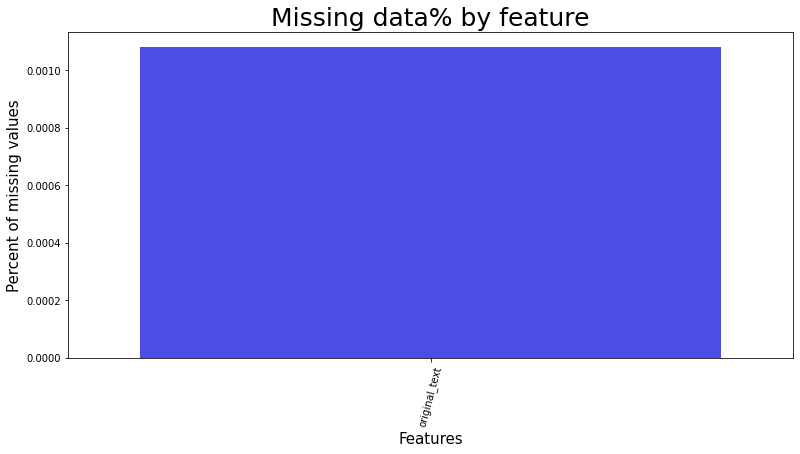

In [62]:
mmf.missingdata(df)

In [63]:
blank = []
for i in range(len(df)):
    try:
        if df.original_text[i].lower() in ['',' ','na']:
            blank.append(i)
    except:
        blank.append(i)
blank

[165579, 213931, 264315, 281963, 355666, 489224]

In [64]:
df.dropna(inplace=True)
# df.drop(blank,inplace=True)

In [65]:
df['clean_text'] = df.original_text.apply(cleanText)
df.head()

,original_text,clean_text
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,: 91-year-old Ex-Vice President Moody Awori La...
1,RT @cnnphilippines: BREAKING: The Department o...,: BREAKING: The Department of Health reports 4...
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,: SidharthShukla Helps Out Fan Who Requested H...
3,Lending Club loan originations down 90% ... bu...,Lending Club loan originations down 90% ... bu...
4,RT @OpIndia_com: Curious case of ‘United Natio...,_com: Curious case of ‘United Nations’ NGO app...


In [66]:
%%time
df.clean_text = df.clean_text.apply(mmf.text_cleantext)
df.head()

Wall time: 1min 34s


,original_text,clean_text
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,president moody awori land inter county commit...
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,sidharthshukla help fan requested help arrange...
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank
4,RT @OpIndia_com: Curious case of ‘United Natio...,curious case united nation ngo appreciating ki...


In [67]:
sia = SentimentIntensityAnalyzer()

In [3]:
def getSentiment(txt):
    score = sia.polarity_scores(txt)
    if score['compound']>.5:
        return 'highly positive'
    elif score['compound']>0:
        return 'positive'
    elif score['compound']==0:
        return 'neutral'
    elif score['compound']>=-.5:
        return 'negative'
    else:
        return 'highly negative'

In [69]:
%%time
df['sentiment'] = df.clean_text.apply(getSentiment)
df.head()

Wall time: 50.3 s


,original_text,clean_text,sentiment
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,president moody awori land inter county commit...,negative
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...,neutral
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,sidharthshukla help fan requested help arrange...,highly positive
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank,neutral
4,RT @OpIndia_com: Curious case of ‘United Natio...,curious case united nation ngo appreciating ki...,highly positive


In [70]:
df[df.sentiment=='neutral']

,original_text,clean_text,sentiment
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...,neutral
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank,neutral
8,RT @EdinburghTrams: Did you know you can buy y...,know buy tram ticket advance also download,neutral
9,RT @SynergyMobile: England’s revamped contact-...,england revamped app enters public trial engla...,neutral
12,RT @Jess_Gagnon: #COVID19 contact tracing unde...,contact tracing underway seven glasgow school ...,neutral
...,...,...,...
555547,RT @demetriachavon: A little wake up call for ...,little wake call wearing mask cousin checked h...,neutral
555549,RT @demetriachavon: A little wake up call for ...,little wake call wearing mask cousin checked h...,neutral
555552,Another meat processing outbreak - this time i...,another meat processing outbreak time u,neutral
555553,RT @HonorDecency: We knew Covid-19 would be sp...,knew would spread trump else rally today know ...,neutral


In [71]:
TextBlob('hello').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [4]:
def getSubjectivity(txt):
    testimonial = TextBlob(txt)
    if testimonial.sentiment.subjectivity > .5:
        return 'highly personal'
    else:
        return 'not so personal'

In [73]:
%%time
df['subjectivity'] = df.clean_text.apply(getSubjectivity)
df.head()

Wall time: 51.7 s


,original_text,clean_text,sentiment,subjectivity
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,president moody awori land inter county commit...,negative,not so personal
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...,neutral,not so personal
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,sidharthshukla help fan requested help arrange...,highly positive,highly personal
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank,neutral,not so personal
4,RT @OpIndia_com: Curious case of ‘United Natio...,curious case united nation ngo appreciating ki...,highly positive,highly personal


In [74]:
%%time
df['sentance_len'] = df.original_text.apply(lambda x : len(word_tokenize(x)))
df.head()

Wall time: 1min 14s


,original_text,clean_text,sentiment,subjectivity,sentance_len
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,president moody awori land inter county commit...,negative,not so personal,18
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...,neutral,not so personal,24
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,sidharthshukla help fan requested help arrange...,highly positive,highly personal,29
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank,neutral,not so personal,19
4,RT @OpIndia_com: Curious case of ‘United Natio...,curious case united nation ngo appreciating ki...,highly positive,highly personal,27


In [21]:
# df.to_csv('clean_unsupervised.csv', index=False)
df = pd.read_csv('clean_unsupervised.csv')
df.dropna(inplace=True)

In [25]:
def getSubjectivity(txt):
    testimonial = TextBlob(txt)
    if testimonial.sentiment.subjectivity > .5:
        return 'highly personal'
    else:
        return 'not so personal'

def getSentiment(txt):
    score = sia.polarity_scores(txt)
    if score['compound']>.5:
        return 'highly positive'
    elif score['compound']>0:
        return 'positive'
    elif score['compound']==0:
        return 'neutral'
    elif score['compound']>=-.5:
        return 'negative'
    else:
        return 'highly negative'

def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT[\s]+','',txt)
    txt = re.sub(r'https?:\/\/\S+','', txt)
    return txt

def model_accuracy(model,xtest,ytest):
    ypred = model.predict(xtest)
    length = len(ytest)
    ylabel = np.argmax(ytest,axis=1)
    yplabel = np.argmax(ypred,axis=1)
    return mmf.classificationReport(ylabel,yplabel)



In [23]:
df.head()

,original_text,clean_text,sentiment,subjectivity,sentance_len
0,RT @RobertAlai: 91-year-old Ex-Vice President ...,president moody awori land inter county commit...,negative,not so personal,18
1,RT @cnnphilippines: BREAKING: The Department o...,breaking department health report people caugh...,neutral,not so personal,24
2,RT @latestly: #SidharthShukla Helps Out Fan Wh...,sidharthshukla help fan requested help arrange...,highly positive,highly personal,29
3,Lending Club loan originations down 90% ... bu...,lending club loan origination hey bank,neutral,not so personal,19
4,RT @OpIndia_com: Curious case of ‘United Natio...,curious case united nation ngo appreciating ki...,highly positive,highly personal,27


In [24]:
df.isna().sum()

original_text    0
clean_text       0
sentiment        0
subjectivity     0
sentance_len     0
dtype: int64

In [25]:
df.sentiment.value_counts()

neutral            144788
positive           122685
negative           101261
highly negative     94540
highly positive     90588
Name: sentiment, dtype: int64

In [26]:
df.subjectivity.value_counts()

not so personal    408311
highly personal    145551
Name: subjectivity, dtype: int64

In [27]:
df.sentance_len.max()

62

In [28]:
max_len = 180

In [29]:
%%time
x = df.clean_text
token = Tokenizer(char_level=False, split=' ')
token.fit_on_texts(x)
vocab = token.index_word

le_senti = LabelEncoder()
le_sub = LabelEncoder()
ysentiment = df.sentiment
ysubjectivity = df.subjectivity
le_senti.fit(ysentiment)
le_sub.fit(ysubjectivity)

def check_sentance(list_):
    for i in list_:
        print(vocab[i],end=' ')
        
len(vocab)

Wall time: 5.18 s


84802

In [30]:
def train_test(df,min_,max_):
    df = df.iloc[min_ : max_, :]
    x = df.clean_text
    ysentiment = df.sentiment
    ysubjectivity = df.subjectivity
    x = token.texts_to_sequences(x)
    x = sequence.pad_sequences(x, maxlen=max_len)
    ysentiment = le_senti.transform(ysentiment)
    ysentiment = np_utils.to_categorical(ysentiment)
    ysubjectivity = le_sub.transform(ysubjectivity)
    ysubjectivity = np_utils.to_categorical(ysubjectivity)
    xtrain, ytrain, xtest, ytest = train_test_split(x, ysentiment, test_size=.3, random_state=42,stratify=ysentiment)
    tdsentiment = [xtrain, ytrain, xtest, ytest]
    xtrain, ytrain, xtest, ytest = train_test_split(x, ysubjectivity, test_size=.3, random_state=42,stratify=ysubjectivity)
    tdsubjectivity = [xtrain, ytrain, xtest, ytest]
    return tdsentiment, tdsubjectivity

In [12]:
df.shape

(553862, 5)

In [31]:
from time import time

In [32]:
start = time()
tdsentiment, tdsubjective = train_test(df,0,200000)
end = time()
print(end-start)

3.812931776046753


In [33]:
len((df.sentiment.value_counts().index))

5

In [34]:
batch = 10000
epoch = 5

In [42]:
sentimentRNN = Sequential()
sentimentRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
sentimentRNN.add(SimpleRNN(max_len, activation="tanh"))
# sentimentRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# sentimentRNN.add(SimpleRNN(int(max_len/2), activation="tanh"))
# sentimentRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# sentimentRNN.add(SimpleRNN(int(max_len/4), activation="tanh"))

sentimentRNN.add(Dense(max_len, activation="relu"))
sentimentRNN.add(Dense((max_len/2), activation="relu"))
sentimentRNN.add(Dropout(0.2))
sentimentRNN.add(Dense(len(df.sentiment.value_counts()), activation="softmax"))

sentimentRNN.compile(optimizer="adam", loss="categorical_crossentropy",metrics='accuracy')
#sparse_categorical_crossentropy

In [20]:
ytrain.shape

(140000, 5)

In [40]:
ytest.shape

(60000, 5)

In [43]:
xtrain, xtest, ytrain, ytest = tdsentiment
sentimentRNN.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])

def model_accuracy(model,xtest,ytest):
    ypred = model.predict(xtest)
    length = len(ytest)
    ylabel = np.argmax(ytest,axis=1)
    yplabel = np.argmax(ypred,axis=1)
    return mmf.classificationReport(ylabel,yplabel)

model_accuracy(sentimentRNN,xtest,ytest)

Epoch 1/5
14/14 [==============================] - 273s 19s/step - loss: 1.2924 - accuracy: 0.5056 - val_loss: 0.7872 - val_accuracy: 0.7179
Epoch 2/5
14/14 [==============================] - 260s 19s/step - loss: 0.4812 - accuracy: 0.8311 - val_loss: 0.3723 - val_accuracy: 0.8666
Epoch 3/5
14/14 [==============================] - 261s 19s/step - loss: 0.1540 - accuracy: 0.9515 - val_loss: 0.2688 - val_accuracy: 0.9099
Epoch 4/5
14/14 [==============================] - 276s 20s/step - loss: 0.0565 - accuracy: 0.9847 - val_loss: 0.2624 - val_accuracy: 0.9200
Epoch 5/5
14/14 [==============================] - 280s 20s/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.2778 - val_accuracy: 0.9220

Test Accuracy :         92.20166666666667%  

Confusion Matrix : 
[[ 9234     3   456    41    21]
 [    8  9579    23    28   587]
 [  564    45  9940   342   381]
 [   33    33   297 14943   385]
 [   31   704   373   324 11625]]

Classification Report : 
              precision    recall  f

In [44]:
subjectiveRNN = Sequential()
subjectiveRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
subjectiveRNN.add(SimpleRNN(max_len, activation="tanh"))
# subjectiveRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# subjectiveRNN.add(SimpleRNN(int(max_len/2), activation="tanh"))
# subjectiveRNN. add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# subjectiveRNN.add(SimpleRNN(int(max_len/4), activation="tanh"))

subjectiveRNN.add(Dense(max_len, activation="relu"))
subjectiveRNN.add(Dense((max_len/2), activation="relu"))
subjectiveRNN.add(Dropout(0.2))
subjectiveRNN.add(Dense(len(df.subjectivity.value_counts()), activation="softmax"))

subjectiveRNN.compile(optimizer="adam", loss="categorical_crossentropy",metrics='accuracy')

In [45]:
xtrain, xtest, ytrain, ytest = tdsubjective
subjectiveRNN.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(subjectiveRNN,xtest,ytest)

Epoch 1/5
14/14 [==============================] - 269s 19s/step - loss: 0.4432 - accuracy: 0.7997 - val_loss: 0.2346 - val_accuracy: 0.9042
Epoch 2/5
14/14 [==============================] - 259s 19s/step - loss: 0.1070 - accuracy: 0.9626 - val_loss: 0.1126 - val_accuracy: 0.9639
Epoch 3/5
14/14 [==============================] - 262s 19s/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.1066 - val_accuracy: 0.9718
Epoch 4/5
14/14 [==============================] - 260s 19s/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.1289 - val_accuracy: 0.9723
Epoch 5/5
14/14 [==============================] - 251s 18s/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1453 - val_accuracy: 0.9727

Test Accuracy :         97.26833333333333%  

Confusion Matrix : 
[[15553   979]
 [  660 42808]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     16532
           1       0.98      0.98      0.98     43468

    acc

In [53]:
sentimentLSTM = Sequential()
sentimentLSTM.add(Embedding(len(vocab)+1, 100, input_length=max_len, mask_zero=True))
sentimentLSTM.add(LSTM(max_len))#, activation="tanh"))
# subjectiveRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# subjectiveRNN.add(SimpleRNN(int(max_len/2), activation="tanh"))
# subjectiveRNN.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
# subjectiveRNN.add(SimpleRNN(int(max_len/4), activation="tanh"))

sentimentLSTM.add(Dense(max_len, activation="relu"))
sentimentLSTM.add(Dense((max_len/2), activation="relu"))
sentimentLSTM.add(Dropout(0.2))
sentimentLSTM.add(Dense(len(df.sentiment.value_counts().index), activation="softmax"))

sentimentLSTM.compile(optimizer="adam", loss="categorical_crossentropy",metrics='accuracy')

In [52]:
ytrain.shape

(140000, 5)

In [54]:
xtrain, xtest, ytrain, ytest = tdsentiment
sentimentLSTM.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(sentimentLSTM,xtest,ytest)

Epoch 1/5
14/14 [==============================] - 315s 22s/step - loss: 1.5832 - accuracy: 0.2739 - val_loss: 1.5101 - val_accuracy: 0.3066
Epoch 2/5
14/14 [==============================] - 298s 21s/step - loss: 1.3050 - accuracy: 0.5085 - val_loss: 0.9910 - val_accuracy: 0.6601
Epoch 3/5
14/14 [==============================] - 295s 21s/step - loss: 0.6754 - accuracy: 0.7720 - val_loss: 0.4908 - val_accuracy: 0.8317
Epoch 4/5
14/14 [==============================] - 297s 21s/step - loss: 0.3142 - accuracy: 0.8974 - val_loss: 0.3111 - val_accuracy: 0.8983
Epoch 5/5
14/14 [==============================] - 291s 21s/step - loss: 0.1653 - accuracy: 0.9500 - val_loss: 0.2412 - val_accuracy: 0.9267

Test Accuracy :         92.66833333333334%  

Confusion Matrix : 
[[ 9135     5   527    76    12]
 [   13  9494    32    25   661]
 [  456    56 10085   253   422]
 [   39    33   232 15040   347]
 [   20   597   430   163 11847]]

Classification Report : 
              precision    recall  f

In [ ]:
ytrain.shape

In [55]:
subjectiveLSTM = Sequential()
subjectiveLSTM.add(Embedding(len(vocab)+1, 700, input_length=max_len, mask_zero=True))
subjectiveLSTM.add(LSTM(max_len, activation="tanh"))

subjectiveLSTM.add(Dense(max_len, activation="relu"))
subjectiveLSTM.add(Dense((max_len/2), activation="relu"))
subjectiveLSTM.add(Dropout(0.2))
subjectiveLSTM.add(Dense(len(df.subjectivity.value_counts()), activation="softmax"))

subjectiveLSTM.compile(optimizer="adam", loss="categorical_crossentropy",metrics='accuracy')

In [56]:
xtrain, xtest, ytrain, ytest = tdsubjective
subjectiveLSTM.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(subjectiveLSTM,xtest,ytest)

Epoch 1/5
14/14 [==============================] - 903s 65s/step - loss: 0.5933 - accuracy: 0.7082 - val_loss: 0.4451 - val_accuracy: 0.7679
Epoch 2/5
14/14 [==============================] - 910s 66s/step - loss: 0.3059 - accuracy: 0.8736 - val_loss: 0.1821 - val_accuracy: 0.9275
Epoch 3/5
14/14 [==============================] - 972s 70s/step - loss: 0.0954 - accuracy: 0.9667 - val_loss: 0.1021 - val_accuracy: 0.9678
Epoch 4/5
14/14 [==============================] - 1021s 73s/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0895 - val_accuracy: 0.9746
Epoch 5/5
14/14 [==============================] - 953s 69s/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.0953 - val_accuracy: 0.9769

Test Accuracy :         97.69333333333333%  

Confusion Matrix : 
[[15837   695]
 [  689 42779]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16532
           1       0.98      0.98      0.98     43468

    ac

# 

In [105]:
start = time()
tdsentiment, tdsubjective = train_test(df,200000,-1)
end = time()
print(end-start)

7.558870553970337


In [33]:
len((df.sentiment.value_counts().index))

5

In [107]:
batch = 10000
epoch = 5

In [108]:
xtrain, xtest, ytrain, ytest = tdsentiment
sentimentRNN.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(sentimentRNN,xtest,ytest)

Epoch 1/3
25/25 [==============================] - 514s 20s/step - loss: 0.4346 - accuracy: 0.8591 - val_loss: 0.2167 - val_accuracy: 0.9285
Epoch 2/3
25/25 [==============================] - 496s 20s/step - loss: 0.1291 - accuracy: 0.9632 - val_loss: 0.1612 - val_accuracy: 0.9497
Epoch 3/3
25/25 [==============================] - 494s 20s/step - loss: 0.0677 - accuracy: 0.9832 - val_loss: 0.1514 - val_accuracy: 0.9540

Test Accuracy :         95.40217974924406%  

Confusion Matrix : 
[[17883    14   687    14     9]
 [   17 16197    30     7   700]
 [  545    37 17754   216   554]
 [    5     2   369 27076   294]
 [   38   657   506   180 22368]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     18607
           1       0.96      0.96      0.96     16951
           2       0.92      0.93      0.92     19106
           3       0.98      0.98      0.98     27746
           4       0.93      0.94      0.94    

In [109]:
xtrain, xtest, ytrain, ytest = tdsubjective
subjectiveRNN.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(subjectiveRNN,xtest,ytest)

Epoch 1/3
25/25 [==============================] - 510s 20s/step - loss: 0.1581 - accuracy: 0.9534 - val_loss: 0.0766 - val_accuracy: 0.9755
Epoch 2/3
25/25 [==============================] - 511s 20s/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0598 - val_accuracy: 0.9818
Epoch 3/3
25/25 [==============================] - 511s 21s/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0678 - val_accuracy: 0.9823

Test Accuracy :         98.22907148710895%  

Confusion Matrix : 
[[26184   949]
 [  931 78095]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27133
           1       0.99      0.99      0.99     79026

    accuracy                           0.98    106159
   macro avg       0.98      0.98      0.98    106159
weighted avg       0.98      0.98      0.98    106159



In [110]:
xtrain, xtest, ytrain, ytest = tdsentiment
sentimentLSTM.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(sentimentLSTM,xtest,ytest)

Epoch 1/3
25/25 [==============================] - 704s 28s/step - loss: 0.3687 - accuracy: 0.8820 - val_loss: 0.2117 - val_accuracy: 0.9379
Epoch 2/3
25/25 [==============================] - 700s 28s/step - loss: 0.1471 - accuracy: 0.9611 - val_loss: 0.1627 - val_accuracy: 0.9548
Epoch 3/3
25/25 [==============================] - 683s 27s/step - loss: 0.0991 - accuracy: 0.9766 - val_loss: 0.1506 - val_accuracy: 0.9589

Test Accuracy :         95.89389500654678%  

Confusion Matrix : 
[[17923    14   624    23    23]
 [   15 16414    30     8   484]
 [  479    36 17811   153   627]
 [    5     0   244 27082   415]
 [   39   615   424   101 22570]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18607
           1       0.96      0.97      0.96     16951
           2       0.93      0.93      0.93     19106
           3       0.99      0.98      0.98     27746
           4       0.94      0.95      0.94    

In [111]:
xtrain, xtest, ytrain, ytest = tdsubjective
subjectiveLSTM.fit(xtrain, ytrain, epochs=epoch, batch_size=batch, validation_data=[xtest,ytest])
model_accuracy(subjectiveLSTM,xtest,ytest)

Epoch 1/3
25/25 [==============================] - 2404s 96s/step - loss: 0.1248 - accuracy: 0.9614 - val_loss: 0.0719 - val_accuracy: 0.9771
Epoch 2/3
25/25 [==============================] - 2370s 95s/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0550 - val_accuracy: 0.9839
Epoch 3/3
25/25 [==============================] - 2185s 87s/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.0569 - val_accuracy: 0.9850

Test Accuracy :         98.50130464680338%  

Confusion Matrix : 
[[26306   827]
 [  764 78262]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27133
           1       0.99      0.99      0.99     79026

    accuracy                           0.99    106159
   macro avg       0.98      0.98      0.98    106159
weighted avg       0.99      0.99      0.99    106159



In [112]:
sentimentRNN.save('./app/model/sentimentRNN')
subjectiveRNN.save('./app/model/subjectivityRNN')
sentimentLSTM.save('./app/model/sentimentLSTM')
subjectiveLSTM.save('./app/model/subjectivityLSTM')

INFO:tensorflow:Assets written to: ./app/model/sentimentRNN\assets


INFO:tensorflow:Assets written to: ./app/model/sentimentRNN\assets


INFO:tensorflow:Assets written to: ./app/model/subjectivityRNN\assets


INFO:tensorflow:Assets written to: ./app/model/subjectivityRNN\assets


INFO:tensorflow:Assets written to: ./app/model/sentimentLSTM\assets


INFO:tensorflow:Assets written to: ./app/model/sentimentLSTM\assets


INFO:tensorflow:Assets written to: ./app/model/subjectivityLSTM\assets


INFO:tensorflow:Assets written to: ./app/model/subjectivityLSTM\assets


In [142]:
import joblib
joblib.dump(token, './app/token')
joblib.dump(le_senti, './app/label_encoder_sentiment')
joblib.dump(le_sub, './app/label_encoder_subjective')

['./app/label_encoder_subjective']

# 

In [114]:
from keras.models import load_model
model = load_model('./app/model/sentimentRNN/')

In [137]:
def predict(txt,model=sentimentLSTM,encoder=le_senti):
    txt = cleanText(txt)
    txt = mmf.text_cleantext(txt)
    txt = token.texts_to_sequences([txt])
    txt = sequence.pad_sequences(txt, maxlen=max_len)
    label = model.predict([txt])
    label = encoder.inverse_transform([np.argmax(label,axis=1)])[0]
    print(label)
    return label

In [4]:
from keras.models import load_model

In [1]:
import joblib

In [2]:
token = joblib.load('./app/token')

In [13]:
sentiment = load_model('./app/model/sentimentLSTM/')
le_senti = joblib.load('./app/label_encoder_sentiment')
subjective = load_model('./app/model/subjectivityLSTM/')
le_sub = joblib.load('./app/label_encoder_subjective')

In [22]:
text = [
    'This is so fun i just dont want it to end',#joy
    'can you please shut up',#anger
    "@Iluvmiasantos ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang ",#joy
    'I have a feeling i will fail french #fuckfrench', #joy
    'If you are robbed of during tribulation it is because u hav not entered into the means He has provided for Joy #prayer Communion w God', #joy
    "@wt2themax1 I'm sorry my blanket isn't comfortable enough for you, that kid isn't #hehasfeelingstoo so what if he eats his scabs...", #disgust
    'I gag in myself wenever i hear my parents say &quot;sexci&quot; =/ ', #disgust
    "I don't girls nowadays who talk to their friends like their talking to their husbands ", #disgust
    'Haha of course I come home to a different house, leave it to my parents to redo the entire downstairs without warning ', #surprise
    "Getting ready for a baby shower at work. Here's hoping no one at work is following me on twitter hahaha Surprise!!", #surprise
    "The awkward moment when you're on a date and you look down and realize your pants aren't zipped. ",#surprise
    
       ]

In [16]:
def predictSentimentIntensity(
    text,
    model,
    encoder,
    token=token,
    max_len=180
    ):
    text = cleanText(text)
    text = mmf.text_cleantext(text)
    text = token.texts_to_sequences([text])
    text = sequence.pad_sequences(text, maxlen=max_len)
    label = model.predict([text])
    probability = label
    label = encoder.inverse_transform([np.argmax(label,axis=1)])[0]
    return label, probability, encoder